### 173 samples, Final_R is missing for the following sample
137)	MC	air	204	8	180	60	180	500	30	114	0.3	NA	150	0.3	100	0.490196078	486.395	57.78712883	26.00664167	0.467	9.68631173	3	0.422680412	0.541775715	0.521526486	44.36424367

In [96]:
# Import Python libaries
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.optimize import curve_fit
import time as time
# General data management
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn import linear_model
from sklearn import ensemble
from xgboost import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# import pydo
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)

# Machine learning & model visualization tools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from numpy import cov
from scipy.stats import pearsonr
from scipy import ndimage, misc
import pydot
import math
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# from sklearn.externals import joblib
# Miscellaneous
import os
import io
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.inspection import partial_dependence, plot_partial_dependence

In [97]:
dropped = ['Mass', 'Init_R', 'Fin_R', 'Voltage', 'Res_Volt', 'PulseTime_I', 'I_Mean']
def import_file(filename):
    # Convert to pandas dataframe & take a look
    # filename='FJH_ML.csv'
    df = pd.read_csv(filename, sep=",", encoding='ISO-8859-1', header=1)
    # df = df.drop('Unnamed: 27', axis=1)
    # df = df.drop('Unnamed: 28', axis=1)
    # df = df.drop('Unnamed: 29', axis=1)
    df = df.dropna()
    # Convert numerical columns to float
    interest = ['Mass', 'Pretreat_voltage', 'Pretreat_highest', 'Voltage', 'PulseTime', 'Cap', 
                'Res_Volt', 'Init_R', 'Fin_R', 'Volt_Drop', 'Res_Drop', 'Yield_Per', 'I_Max', 
                'I_Mean', 'Charge_Tot', 'PulseTime_I', 'I_Final', 'Maxima', 'Graphene_Yield', 
                'TwoDtoG', 'DtoG', 'FWHM 2D']
    for i in range(0, len(interest)):
        col = interest[i]
        df[col] = df[col].astype(float)
    # Fix percentages
    df['Graphene_Yield'] = df['Graphene_Yield']*100
    df['Yield_Per'] = df['Yield_Per']*100
    
    
    
    # Drop problematic data for this particular analysis
    dropped_features = [ 'Res_Drop',
             'PulseTime_I', 'I_Mean', 'Maxima']
    df = df.drop(dropped_features, axis=1)
    
    
    
    # df = df[df['Yield_Per']>50]
    # Also drop asinine variables
    
    #df = df.drop('Map File ID', axis = 1)
    df = df.drop('Tube Diam', axis = 1)

    # categorize_yield(df)
    # One-hot encode the data using pandas get_dummies
    df = pd.get_dummies(df)
    # df = df[df['Material_CB']>0.5]
    # Drop 1 thing
    # df = df.drop['']
    # Dataset is now stored in a Pandas Dataframe
    # print(df.shape)
    # print(df.head())
    # print(df.isnull().sum())
    return df

def import_file_noOneHot(filename):
# Convert to pandas dataframe & take a look
    # filename='FJH_ML.csv'
    df = pd.read_csv(filename, sep=",", encoding='ISO-8859-1', header=1)
    # df = df.drop('Unnamed: 27', axis=1)
    # df = df.drop('Unnamed: 28', axis=1)
    # df = df.drop('Unnamed: 29', axis=1)
    df = df.dropna()
    # Convert numerical columns to float
    interest = ['Mass', 'Pretreat_voltage', 'Pretreat_highest', 'Voltage', 'PulseTime', 'Cap', 
                'Res_Volt', 'Init_R', 'Fin_R', 'Volt_Drop', 'Res_Drop', 'Yield_Per', 'I_Max', 
                'I_Mean', 'PulseTime_I', 'I_Final', 'Maxima', 'Graphene_Yield', 'TwoDtoG', 'DtoG', 'FWHM 2D']
    for i in range(0, len(interest)):
        col = interest[i]
        df[col] = df[col].astype(float)
    # Fix percentages
    df['Graphene_Yield'] = df['Graphene_Yield']*100
    df['Yield_Per'] = df['Yield_Per']*100
    # Drop problematic data for this particular analysis
    # df = df[df['Yield_Per']>50]
    # Also drop asinine variables
    try:
        df = df.drop('Map File ID', axis = 1)
    except:
        pass
    df = df.drop('Tube Diam', axis = 1)
    # categorize_yield(df)
    # One-hot encode the data using pandas get_dummies
    # df = pd.get_dummies(df)
    # df = df[df['Material_CB']>0.5]
    # Drop 1 thing
    # df = df.drop['']
    # Dataset is now stored in a Pandas Dataframe
    # print(df.shape)
    # print(df.head())
    # print(df.isnull().sum())
    return df

def categorize_yield(df, threshold=50):
    yield_cat = []
    for i in range(0, len(df)):
        if df['Yield_Per'].iloc[i] < threshold:
            yield_cat.append(0)
        else:
            yield_cat.append(1)
    print(len(df))
    print(len(yield_cat))
    df['Yield_Cat'] = yield_cat
    return df['Yield_Cat']
    
def leave_one_out_proc(clf):
    # Leave one out evaluation
    # enumerate splits
    y_true, y_pred = list(), list()
    # Create leave one out procedure
    cv = LeaveOneOut()
    for train_ix, test_ix in cv.split(features):
        # split data
        train_features, test_features = features[train_ix, :], features[test_ix, :]
        train_labels, test_labels = labels[train_ix], labels[test_ix]
        clf.fit(train_features, train_labels)
        # evaluate model
        yhat = clf.predict(test_features)
        # store
        y_true.append(test_labels[0])
        y_pred.append(yhat[0])
    print('doneskies')
    return y_true, y_pred, clf

def category_normalization_theonesyoualwaysuse(df):
    groups = df.groupby(['Material'])
    norm_I_Max = []
    norm_charge_tot=[]
    for name, group in groups:
        I_Max_array = np.asfarray(group.I_Max)
        charge_tot_array = np.asfarray(group.Charge_Tot)
        mean_I_Max = np.mean(I_Max_array)
        mean_charge_tot = np.mean(charge_tot_array)
        std_I_Max = np.std(I_Max_array)
        std_charge_tot = np.std(charge_tot_array)
        print("Mean of I Max", name, "is ", mean_I_Max)
        norm_I_Max_cat = np.divide(np.subtract(I_Max_array, mean_I_Max), std_I_Max)
        norm_charge_tot_cat = np.divide(np.subtract(charge_tot_array, mean_charge_tot), std_charge_tot)
        norm_I_Max = np.append(norm_I_Max, norm_I_Max_cat)
        norm_charge_tot = np.append(norm_charge_tot, norm_charge_tot_cat)
    return norm_I_Max, norm_charge_tot

def category_normalization_mass(df):
    groups = df.groupby(['Material'])
    norm_array = []
    for name, group in groups:
        yield_array = np.asfarray(group.Mass)
        mean_yield = np.mean(yield_array)
        std_yield = np.std(yield_array)
        print("Mean of ", name, "is ", mean_yield)
        norm_yield_cat = np.divide(np.subtract(yield_array, mean_yield), std_yield)
        norm_array = np.append(norm_array, norm_yield_cat)
    return norm_array

Mean of I Max CB is  199.5962952631579
Mean of I Max MC is  548.2808046511627
Mean of I Max PA is  301.9472116666666
Mean of I Max TCB is  217.5159437837838


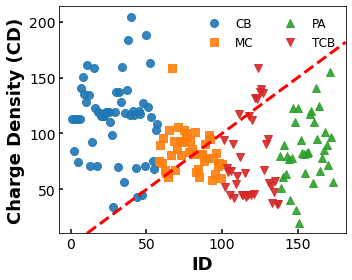

In [98]:
# Plot charge density (CD) for different materials 
fig, ax = plt.subplots(figsize=(5,4))
# Import file
filename='FJH_ML_Final.csv'
df_nothotenc = import_file_noOneHot(filename)
# Create normalized I by category
norm1, norm2 = category_normalization_theonesyoualwaysuse(df_nothotenc)
df_nothotenc['Norm_I_Max'] = norm1
df_nothotenc['Norm_charge_tot'] = norm2
df_nothotenc['charge_density'] = df_nothotenc['Voltage']*df_nothotenc['Cap']/df_nothotenc['Mass']

# df_nothotenc['test_feature'] = (df_nothotenc['Voltage']/df_nothotenc['Mass'])#*df_nothotenc['PulseTime']
# df_nothotenc = df_nothotenc[df_nothotenc['TwoDtoG']<1.5]
# df_nothotenc = df_nothotenc[df_nothotenc['Graphene_Yield']>20]

groups = df_nothotenc.groupby(['Material'])

df_nothotenc['ID'] = list(range(1, df_nothotenc['charge_density'].shape[0]+1))
# Plot
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
counter=0
markers = ['o', 's', '^', 'v']
colors=['blue', 'red', 'green', 'orange']
colors2 = ['maroon', 'darkorange', 'goldenrod', 'dodgerblue']
for name, group in groups:
    ax.plot(group.ID, group.charge_density, marker=markers[counter], alpha=0.9, linestyle='', ms=8, label=name)
    counter+=1
    # Predicted 2D/G
# plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_xlabel('ID', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_ylabel('Charge Density (CD)', fontsize='18', fontname='Time', fontweight='bold')
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)
ax.plot(x2,y2, linestyle='--', linewidth = '3', color='red')
leg = plt.legend(frameon="True", prop={'family': 'Arial'})
ax.legend(frameon=False, ncol=2, fontsize=12, loc='upper right')

# Plot
# plt.plot(df_nothotenc['I_Max'],df_nothotenc['Graphene_Yield'], linestyle = 'none', marker = 'o', color='black', markersize='8')
# plt.xlabel('Flash Voltage (V)', fontsize='18', fontname='Arial', fontweight='bold')
# plt.ylabel('D/G Ratio', fontsize='18', fontname='Arial', fontweight='bold')
# Save
plt.tight_layout()
plt.savefig('cvDist_material.png', dpi=300)
plt.show()

In [99]:
# Import file for ML model
filename='FJH_ML_Final.csv'
df1 = import_file_noOneHot(filename)
Imax, chargetot = category_normalization_theonesyoualwaysuse(df1)
yield_array = category_normalization_mass(df1)
df = import_file(filename)
# df['Norm_I_Max'] = Imax
df['Norm_charge_tot'] = df['Charge_Tot']/(df['Mass'])*1000
df['Norm_I_Max'] = df['I_Max']/df['Mass']*1000
# df['Discharge_Rate'] = (df['Volt_Drop']/df['Mass'])/df['PulseTime']
# df['norm_mass'] = yield_array
# df['cap_energy'] = 0.5*df['Voltage']*df['Voltage']*df['Cap']/df['Mass']
df['charge_density'] = df['Voltage']*df['Cap']/df['Mass']
# df['charge_density2'] = df['Volt_Drop']*df['Cap']/df['Mass']
# df['RC'] = df['Init_R']*df['Cap']
# df['test_feature'] = 1/df['Mass']
df['Final_Current_Percent'] = df['I_Final']/df['I_Max']
# convert it to Mega Joule 1e-5
df['heat_power'] = df['Voltage']*df['Voltage']/df['Init_R']*df['PulseTime']*(1e-5)
# df['discharge_per'] = df['Res_Volt']/df['Voltage']
# df['Pretreat_CD'] = df['Pretreat_highest']*df['Cap']/df['Mass']
# df['inv_Mass'] = 1/df['Mass']
#df['average_res'] = (df['Init_R']+df['Fin_R'])/2
#df['Power'] = df['I_Max']*df['I_Max']*df['average_res']/df['Mass']
# df = df.drop('average_res', axis=1)
# df['test_feature'] = df['Res_Volt']/df['Voltage']
# df = df.drop('norm_mass', axis=1)
# Drop stuff
#df = df.drop('Voltage', axis=1)
#df = df.drop('Res_Volt', axis=1)
# df = df.drop('Norm_I_Max', axis=1)
#df = df.drop('Volt_Drop', axis=1)
#df = df.drop('Mass', axis=1)
#df = df.drop('Cap', axis=1)
#df = df.drop('PulseTime', axis=1)
#df = df.drop('I_Final', axis=1)
#df = df.drop('Fin_R', axis=1)
#df = df.drop('Init_R', axis=1)
#df = df.drop('Pretreat_highest', axis=1)
#df = df.drop('Pretreat_voltage', axis=1)

# Why he droped Material_PA and Material_TCB?
#df = df.drop('Material_PA', axis=1)
#df = df.drop('Material_TCB', axis=1)


# df = df.drop('Norm_charge_tot', axis=1)
#df = df.drop('Charge_Tot', axis=1)
# df = df.drop('Final_Current_Percent', axis=1)
# df = df.drop('charge_density', axis=1)
# df = df.drop('average_res', axis=1)""
#df['FJH_Power'] = df['I_Max']*df['I_Max']*df['Init_R']
# df = df[df['Graphene_Yield']>20]
threshold = 77
df['Yield_Cat'] = categorize_yield(df, threshold=threshold)
# Print stats
print(df.shape)
print(df.head())
# print(len(df))
print(sum(df['Material_MC']))

Mean of I Max CB is  199.5962952631579
Mean of I Max MC is  548.2808046511627
Mean of I Max PA is  301.9472116666666
Mean of I Max TCB is  217.5159437837838
Mean of  CB is  186.9859649122807
Mean of  MC is  276.5790697674419
Mean of  PA is  283.28055555555557
Mean of  TCB is  319.81081081081084
173
173
(173, 33)
   Sample   Mass  Pretreat_voltage  Pretreat_highest  Voltage  PulseTime  \
0       1  200.0              60.0              60.0    235.0     1200.0   
1       2  161.9             150.0              50.0    120.0       50.0   
2       3  200.0             240.0              60.0    235.0      300.0   
3       4  200.0             320.0              80.0    235.0      900.0   
4       5  187.0              60.0              60.0    145.0      125.0   

   Res_Volt    Cap  Init_R  Fin_R  ...  Material_TCB  Atmosphere_air  \
0      56.0   96.0     1.6    0.4  ...             0               0   
1      98.0  114.0     1.6    1.0  ...             0               0   
2     161.0  

In [102]:
class0 = sum(df['Yield_Cat']==0)
class1 = sum(df['Yield_Cat']==1)
print ('# of 0 Yield < {}: {} \n# of 1 Yield >= {}: {}'.
      format(threshold, class0, threshold, class1))

# of 0 Yield < 77: 88 
# of 1 Yield >= 77: 85


In [71]:
# proxy properties
Norm_I_Max = np.array (df['Norm_I_Max']).reshape(-1, 1)
Final_Current_Percent  = np.array (df['Final_Current_Percent']).reshape(-1, 1)
Norm_charge_tot  = np.array (df['Norm_charge_tot']).reshape(-1, 1)
# final prediction, yield of Graphene
Graphene_Yield = np.array (df['Yield_Cat']).reshape(-1, 1)

# only process parameters
Pretreat_voltage = np.array (df['Pretreat_voltage']).reshape(-1, 1)
pulsetime = np.array (df['PulseTime']).reshape(-1, 1)
charge_denisty = np.array (df['charge_density']).reshape(-1, 1)
heat_power = np.array (df['heat_power']).reshape(-1, 1)
#Init_R = np.array (df['Init_R']).reshape(-1, 1)

#features = np.asfarray(features)

In [72]:
# type of material
Material_CB = np.array (df['Material_CB']).reshape(-1, 1)
Material_MC = np.array (df['Material_MC']).reshape(-1, 1) 
Material_PA = np.array (df['Material_PA']).reshape(-1, 1)
#Material_TCB = np.array (df['Material_TCB']).reshape(-1, 1)
material_type = np.concatenate ((Material_CB, Material_MC, Material_PA), axis=1)
# extra material descriptors
# Cabot BP2000: Tensile Strength=17 MPa, particle size=15nm, specific surface area=1500(m2/g)
# metallurgical coke: grain size=150-210 (um)
# pyrolysis ash: 
# pyrolyzed rubber tire-derived carbon black: 

In [73]:
# type of Atmosphere
Atmosphere_air = np.array (df['Atmosphere_air']).reshape(-1, 1)
Atmosphere_arg = np.array (df['Atmosphere_arg']).reshape(-1, 1)
#Atmosphere_vac = np.array (df['Atmosphere_vac']).reshape(-1, 1)

atmosphere_type = np.concatenate ((Atmosphere_air, Atmosphere_arg), axis=1)

In [74]:
# proxy (current-time plot) prediction (Final_Current_percent)
new_features = np.concatenate ((charge_denisty,
                                heat_power,
                                pulsetime,
                                material_type,
                                atmosphere_type,
                                Pretreat_voltage), axis=1)

rand=9
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Final_Current_Percent, 
                                       indices, test_size = 0.20, random_state = rand)
feature_list = ['charge_denisty',
                'heat_power',
                'PulseTime',
                'material_CB',
                'material_MC',
                'material_PA',
                'Atmosphere_air',
                'Atmosphere_arg',
                'Pretreat_voltage']

In [46]:
test_new_features[-1]

array([112.8  , 276.125, 900.   ,   1.   ,   0.   ,   0.   ,   0.   ,
         0.   , 320.   ])

In [75]:
r_squareds = list()
r_pearsons = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
start = time.time()
for random_state in range(10):
    # after fixing the hyperparameters, train the model on all samples
    # Instantiate model with 1000 decision tree
    xgbr_final_I_percent = XGBRegressor(max_depth=3, n_estimators=30, gamma=0.01, 
                   learning_rate=0.15, subsample=0.77, min_child_weight=5, 
                   random_state=random_state)
    # xgbr_final_I_percent = linear_model.BayesianRidge()
    # xgbr_final_I_percent = XGBRegressor()
    # Train the model on training data
    labels = Final_Current_Percent
    xgbr_final_I_percent.fit(train_new_features, train_labels);
    #print('Doneskies')
    Final_Current_Percent_test = xgbr_final_I_percent.predict(test_new_features)
    r_squared_Final_Current_test = r2_score(test_labels, Final_Current_Percent_test)
    r_squareds.append(r_squared_Final_Current_test)
    
    r_pearson_Final_Current_test = pearsonr(test_labels.reshape(test_labels.shape[0],), 
                                            Final_Current_Percent_test.reshape(Final_Current_Percent_test.shape[0],))
    r_pearsons.append(r_pearson_Final_Current_test[0])   
    
    Final_Current_Percent_train = xgbr_final_I_percent.predict(train_new_features)
    r_squared_Final_Current_train = r2_score(train_labels, Final_Current_Percent_train)
    r_squareds_train.append(r_squared_Final_Current_train)    

print ('Average of r pearson for test', np.mean(np.array(r_pearsons)))
print ('std of r pearson for test', np.std(np.array(r_pearsons)), '\n')

print ('Average of r_squared for test', np.mean(np.array(r_squareds)))
print ('std of r_squared for test', np.std(np.array(r_squareds)), '\n')

print ('Average of r_squared for train', np.mean(np.array(r_squareds_train)))
print ('std of r_squared for train', np.std(np.array(r_squareds_train)))

plt.scatter

xgbr_final_I_percent.fit(new_features, labels)
# Use the forest's predict method on the test data
Final_Current_Percent_predicted = xgbr_final_I_percent.predict(new_features)
# Calculate the absolute errors
errors = abs(Final_Current_Percent_predicted - Final_Current_Percent)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

r_squared_Final_Current_all = r2_score(Final_Current_Percent, Final_Current_Percent_predicted)
print('r2 score = ', r_squared_Final_Current_all)

# Use the forest's predict method on the test data
Final_Current_Percent_test = xgbr_final_I_percent.predict(test_new_features)
# Calculate the absolute errors
errors_test = abs(Final_Current_Percent_test - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_test), 4), 'units.')

r_squared_Final_Current_test = r2_score(test_labels, Final_Current_Percent_test)
print('r2 score = ', r_squared_Final_Current_test)

Average of r pearson for test 0.9118192036999705
std of r pearson for test 0.006197083937978444 

Average of r_squared for test 0.8280211393455135
std of r_squared for test 0.010756541511675152 

Average of r_squared for train 0.8549819809580331
std of r_squared for train 0.008331015266631023
Mean Absolute Error: 0.2125 units.
r2 score =  0.8879403356083355
Mean Absolute Error: 0.2735 units.
r2 score =  0.9298883059301954


In [76]:
# Get numerical feature importances
importances = list(xgbr_final_I_percent.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {} Importance: {}'.format(feature, importance)) 
 for (feature, importance) in zip(feature_list, feature_importances)];

Variable: charge_denisty Importance: ('charge_denisty', 0.1)
Variable: heat_power Importance: ('heat_power', 0.1)
Variable: PulseTime Importance: ('PulseTime', 0.55)
Variable: material_CB Importance: ('material_CB', 0.06)
Variable: material_MC Importance: ('material_MC', 0.0)
Variable: material_PA Importance: ('material_PA', 0.0)
Variable: Atmosphere_air Importance: ('Atmosphere_air', 0.04)
Variable: Atmosphere_arg Importance: ('Atmosphere_arg', 0.02)
Variable: Pretreat_voltage Importance: ('Pretreat_voltage', 0.12)


In [77]:
# proxy (current-time plot) prediction (Norm_I_Max)
new_features = np.concatenate ((charge_denisty,
                                pulsetime,
                                material_type,
                                atmosphere_type,
                                Pretreat_voltage), axis=1)

rand=9
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Norm_I_Max, 
                                       indices, test_size = 0.2, random_state = rand)

feature_list = ['charge_denisty',
                'PulseTime',
                'material_CB',
                'material_MC',
                'material_PA',
                'Atmosphere_air',
                'Atmosphere_arg',
                'Atmosphere_vac',
                'Pretreat_voltage']

In [13]:
test_new_features[-1]

array([112.8, 900. ,   1. ,   0. ,   0. ,   0. ,   0. , 320. ])

(0.7004515338274155, 2.805078893417584e-06)
Average of pearson r for test 0.7341161209809476
std of pearson 1 for test 0.021432374087350135 

Average of r_squared for test 0.5191678532303939
std of r_squared for test 0.03335243818746641 

Average of r_squared for train 0.7677985545612763
std of r_squared for train 0.010333814961491451
Mean Absolute Error: 734.4991 units.
r2 score =  0.7639661454362234
Mean Absolute Error: 701.2971 units.
r2 score =  0.7273258416119139


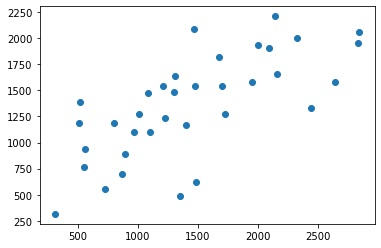

In [78]:
r_squareds = list()
r_pearsons = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
start = time.time()
for random_state in range(10):
    # after fixing the hyperparameters, train the model on all samples
    # Instantiate model with 1000 decision tree
    xgbr_norm_I_max = XGBRegressor(max_depth=3, n_estimators=15, gamma=0.1, 
                   learning_rate=0.2, subsample=0.75, min_child_weight=5, 
                  random_state=random_state)
    # xgbr_norm_I_max = linear_model.BayesianRidge()
    # xgbr_norm_I_max = XGBRegressor()
    # Train the model on training data
    labels = Norm_I_Max
    xgbr_norm_I_max.fit(train_new_features, train_labels);
    
    Norm_I_Max_test = xgbr_norm_I_max.predict(test_new_features)
    r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)

    test_labels_ = test_labels.reshape(test_labels.shape[0], )

    Norm_I_Max_test_ = Norm_I_Max_test.reshape(Norm_I_Max_test.shape[0], )

    r_pearson_Norm_I_Max_test = pearsonr(test_labels_, Norm_I_Max_test_)
    r_pearsons.append(r_pearson_Norm_I_Max_test[0])
    r_squareds.append(r_squared_Norm_I_Max_test)
    
    Norm_I_Max_train = xgbr_norm_I_max.predict(train_new_features)
    r_squared_Norm_I_Max_train = r2_score(train_labels, Norm_I_Max_train)
    r_squareds_train.append(r_squared_Norm_I_Max_train)    
r_pearson_Norm_I_Max_test = pearsonr(test_labels_, Norm_I_Max_test_)
print (r_pearson_Norm_I_Max_test)
plt.scatter(test_labels_, Norm_I_Max_test_)
print ('Average of pearson r for test', np.mean(np.array(r_pearsons)))
print ('std of pearson 1 for test', np.std(np.array(r_pearsons)), '\n')

print ('Average of r_squared for test', np.mean(np.array(r_squareds)))
print ('std of r_squared for test', np.std(np.array(r_squareds)), '\n')

print ('Average of r_squared for train', np.mean(np.array(r_squareds_train)))
print ('std of r_squared for train', np.std(np.array(r_squareds_train)))



xgbr_norm_I_max.fit(new_features, labels)
# Use the forest's predict method on the test data
Norm_I_Max_predicted = xgbr_norm_I_max.predict(new_features)
# Calculate the absolute errors
errors = abs(Norm_I_Max_predicted - Norm_I_Max)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

r_squared_Norm_I_Max_all = r2_score(Norm_I_Max, Norm_I_Max_predicted)
print('r2 score = ', r_squared_Norm_I_Max_all)

# Use the forest's predict method on the test data
Norm_I_Max_test = xgbr_norm_I_max.predict(test_new_features)
# Calculate the absolute errors
errors_test = abs(Norm_I_Max_test - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_test), 4), 'units.')

r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
print('r2 score = ', r_squared_Norm_I_Max_test)

In [79]:
# Get numerical feature importances
importances = list(xgbr_norm_I_max.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {} Importance: {}'.format(feature, importance)) 
 for (feature, importance) in zip(feature_list, feature_importances)];

Variable: charge_denisty Importance: ('charge_denisty', 0.14)
Variable: PulseTime Importance: ('PulseTime', 0.06)
Variable: material_CB Importance: ('material_CB', 0.05)
Variable: material_MC Importance: ('material_MC', 0.57)
Variable: material_PA Importance: ('material_PA', 0.04)
Variable: Atmosphere_air Importance: ('Atmosphere_air', 0.0)
Variable: Atmosphere_arg Importance: ('Atmosphere_arg', 0.05)
Variable: Atmosphere_vac Importance: ('Atmosphere_vac', 0.11)


In [80]:
# proxy (current-time plot) prediction (Norm_charge_tot)
new_features = np.concatenate ((charge_denisty,
                                pulsetime,
                                material_type,
                                atmosphere_type,
                                Pretreat_voltage), axis=1)

rand=9
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Norm_charge_tot, 
                                       indices, test_size = 0.20, random_state = rand)
feature_list = ['charge_denisty',
                'PulseTime',
                'material_CB',
                'material_MC',
                'material_PA',
                'Atmosphere_air',
                'Atmosphere_arg',
                'Pretreat_voltage']

In [81]:
r_squareds = list()
r_pearsons = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
start = time.time()
for random_state in range(50):
    # after fixing the hyperparameters, train the model on all samples
    # Instantiate model with 1000 decision tree
    xgbr_norm_charge_total = XGBRegressor(max_depth=3, n_estimators=28, gamma=0.01, 
                   learning_rate=0.116, subsample=0.75, min_child_weight=6, 
                  random_state=random_state)
    # xgbr_norm_charge_total = linear_model.BayesianRidge()
    # xgbr_norm_charge_total = XGBRegressor()
    # Train the model on training data
    labels = Norm_charge_tot
    xgbr_norm_charge_total.fit(train_new_features, train_labels);
    #print('Doneskies')
    Norm_charge_tot_test = xgbr_norm_charge_total.predict(test_new_features)
    r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
    r_squareds.append(r_squared_Norm_charge_tot_test)
    
    test_labels_ = test_labels.reshape(test_labels.shape[0], )
    Norm_charge_tot_test_ = Norm_charge_tot_test.reshape(Norm_charge_tot_test.shape[0], )
    r_pearson_Norm_charge_tot_test = pearsonr(test_labels_, Norm_charge_tot_test_)
    r_pearsons.append(r_pearson_Norm_charge_tot_test[0])

    
    Norm_charge_tot_train = xgbr_norm_charge_total.predict(train_new_features)
    r_squared_Norm_charge_tot_train = r2_score(train_labels, Norm_charge_tot_train)
    r_squareds_train.append(r_squared_Norm_charge_tot_train)    

print ('Average of pearson r for test', np.mean(np.array(r_pearsons)))
print ('std of pearson 1 for test', np.std(np.array(r_pearsons)), '\n')

print ('Average of r_squared for test', np.mean(np.array(r_squareds)))
print ('std of r_squared for test', np.std(np.array(r_squareds)), '\n')

print ('Average of r_squared for train', np.mean(np.array(r_squareds_train)))
print ('std of r_squared for train', np.std(np.array(r_squareds_train)))


xgbr_norm_charge_total.fit(new_features, labels)
# Use the forest's predict method on the test data
Norm_charge_tot_predicted = xgbr_norm_charge_total.predict(new_features)
# Calculate the absolute errors
errors = abs(Norm_charge_tot_predicted - Norm_charge_tot)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

r_squared_Norm_charge_tot_all = r2_score(Norm_charge_tot, Norm_charge_tot_predicted)
print('r2 score = ', r_squared_Norm_charge_tot_all)

# Use the forest's predict method on the test data
Norm_charge_tot_test = xgbr_norm_charge_total.predict(test_new_features)
# Calculate the absolute errors
errors_test = abs(Norm_charge_tot_test - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_test), 4), 'units.')

r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
print('r2 score = ', r_squared_Norm_charge_tot_test)

Average of pearson r for test 0.6996058291621224
std of pearson 1 for test 0.020725025868674873 

Average of r_squared for test 0.4756160555824475
std of r_squared for test 0.02779007273902078 

Average of r_squared for train 0.7089506351791509
std of r_squared for train 0.008980003715967303
Mean Absolute Error: 29.8406 units.
r2 score =  0.7112441443181463
Mean Absolute Error: 33.2547 units.
r2 score =  0.7380678571587413


In [82]:
# Get numerical feature importances
importances = list(xgbr_norm_charge_total.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {} Importance: {}'.format(feature, importance)) 
 for (feature, importance) in zip(feature_list, feature_importances)];

Variable: charge_denisty Importance: ('charge_denisty', 0.26)
Variable: PulseTime Importance: ('PulseTime', 0.28)
Variable: material_CB Importance: ('material_CB', 0.07)
Variable: material_MC Importance: ('material_MC', 0.18)
Variable: material_PA Importance: ('material_PA', 0.06)
Variable: Atmosphere_air Importance: ('Atmosphere_air', 0.0)
Variable: Atmosphere_arg Importance: ('Atmosphere_arg', 0.0)
Variable: Pretreat_voltage Importance: ('Pretreat_voltage', 0.16)


In [83]:
heat_power = np.array (df['Voltage']*df['Voltage']/df['Init_R']*df['PulseTime']).reshape(-1, 1)
# Porxy properties, as well as process parameters
new_features = np.concatenate ((charge_denisty, 
                                material_type, 
                                pulsetime,
                                Pretreat_voltage,
                                atmosphere_type,
                                Final_Current_Percent_predicted.reshape(-1, 1),
                                Norm_I_Max_predicted.reshape(-1, 1),
                                Norm_charge_tot_predicted.reshape(-1, 1)), axis=1)
#                                heat_power.reshape(-1, 1)), axis=1)

rand=9
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Graphene_Yield, 
                                       indices, test_size = 0.20, random_state = rand)

feature_list = ['charge_denisty',
                'material_CB',
                'material_MC',
                'material_PA',
                'PulseTime',
                'Pretreat_voltage',
                'Atmosphere_air',
                'Atmosphere_arg',
                'Final_Current_Percent',
                'Norm_I_Max',
                'Norm_charge_tot']

In [84]:
lr_aucs = list()
train_lr_aucs = list()
start = time.time()
for random_state in range(10):
    # Instantiate model with 1000 decision trees
    xgbc_graphyield = XGBClassifier(max_depth=5, n_estimators=20, gamma=0.01, eval_metric='logloss',
                   learning_rate=0.2, subsample=0.75, min_child_weight=5, use_label_encoder=False,
                   random_state=random_state)

    # Train the model on training data
    xgbc_graphyield.fit(train_new_features, train_labels.ravel());
    # Use the forest's predict method on the test data
    predictions = xgbc_graphyield.predict_proba(test_new_features)
    # Calculate the absolute errors
    # Print out the mean absolute error (mae)
    #print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')
    lr_auc = roc_auc_score(test_labels, predictions[:, 1])
    lr_aucs.append(lr_auc)
    
    pred_train = xgbc_graphyield.predict_proba(train_new_features)
    train_lr_auc = roc_auc_score(train_labels, pred_train[:, 1])
    train_lr_aucs.append(train_lr_auc)
    #print (lr_auc, train_lr_auc)

# train accuracy
print ('mean lr_auc for test:', np.mean(lr_aucs))
print ('mean lr_auc for train:', np.mean(train_lr_aucs))

pred_train = xgbc_graphyield.predict(train_new_features)
pred_test = xgbc_graphyield.predict(test_new_features)
end = time.time()
print ('time is: ', end-start)

mean lr_auc for test: 0.675
mean lr_auc for train: 0.8481450850661625
time is:  6.1854493618011475



===== Confusion Matrix (between subject's) =====
[[12.  5.]
 [ 1. 17.]]

===== Normalized Confusion Matrix (between subject's) =====
[[0.70588235 0.29411765]
 [0.05555556 0.94444444]]

===== Colormap of Normalized Confusion Matrix (between subject's) =====
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.77      0.94      0.85        18

    accuracy                           0.83        35
   macro avg       0.85      0.83      0.83        35
weighted avg       0.85      0.83      0.83        35



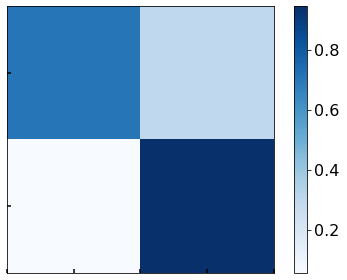

In [32]:
# Define classifiers
conversion_indices = {
  'aC': 0,
  'G': 1,
}

# Plot confusion matrix
confusion_matrix = np.zeros((len(conversion_indices), len(conversion_indices)))

# First row is Graphene Yield < 50% == 0
# Second row is Graphene Yield > 50% == 0
for i in range(len(test_labels)):
    confusion_matrix[int(test_labels[i]), int(pred_test[i])] += 1
    
print("\n===== Confusion Matrix (between subject's) =====")
print(confusion_matrix)

for i in range(confusion_matrix.shape[0]):
    # print(sum(confusion_matrix[i, :]))
    confusion_matrix[i, :] = confusion_matrix[i, :]/sum(confusion_matrix[i, :])
    
print("\n===== Normalized Confusion Matrix (between subject's) =====")
print(confusion_matrix)

print("\n===== Colormap of Normalized Confusion Matrix (between subject's) =====")
# Format plot
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
imshow_kwargs = {
    'cmap': 'Blues',
}
ax.set_yticks([0, 1])
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.imshow(confusion_matrix, **imshow_kwargs)
# plt.xlabel('Predicted', fontname="Arial", fontsize="20", fontweight = "bold")
# plt.ylabel('Actual', fontname="Arial", fontsize="20", fontweight = "bold")
cb = plt.colorbar()
cb.ax.tick_params(labelsize='16')
# plt.show()

metric = classification_report(test_labels, pred_test)
print(metric)

# Format and save
plt.tight_layout()
# plt.savefig('ConfusionMatrixClassifier.png', dpi=300) # Change file name
# plt.show(


===== Confusion Matrix (between subject's) =====
[[58.  8.]
 [13. 59.]]

===== Normalized Confusion Matrix (between subject's) =====
[[0.87878788 0.12121212]
 [0.18055556 0.81944444]]

===== Colormap of Normalized Confusion Matrix (between subject's) =====
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        66
           1       0.88      0.82      0.85        72

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138



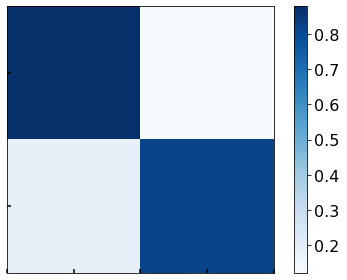

In [33]:
# classification accuracy for train data
# Define classifiers
conversion_indices = {
  'aC': 0,
  'G': 1,
}

# Plot confusion matrix
confusion_matrix = np.zeros((len(conversion_indices), len(conversion_indices)))

for i in range(len(train_labels)):
    confusion_matrix[int(train_labels[i]), int(pred_train[i])] += 1
    
print("\n===== Confusion Matrix (between subject's) =====")
print(confusion_matrix)

for i in range(confusion_matrix.shape[0]):
    # print(sum(confusion_matrix[i, :]))
    confusion_matrix[i, :] = confusion_matrix[i, :]/sum(confusion_matrix[i, :])
    
print("\n===== Normalized Confusion Matrix (between subject's) =====")
print(confusion_matrix)

print("\n===== Colormap of Normalized Confusion Matrix (between subject's) =====")
# Format plot
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
imshow_kwargs = {
    'cmap': 'Blues',
}
ax.set_yticks([0, 1])
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.imshow(confusion_matrix, **imshow_kwargs)
# plt.xlabel('Predicted', fontname="Arial", fontsize="20", fontweight = "bold")
# plt.ylabel('Actual', fontname="Arial", fontsize="20", fontweight = "bold")
cb = plt.colorbar()
cb.ax.tick_params(labelsize='16')
# plt.show()

metric = classification_report(train_labels, pred_train)
print(metric)

# Format and save
plt.tight_layout()
# plt.savefig('ConfusionMatrixClassifier.png', dpi=300) # Change file name
# plt.show(

In [34]:
# Get numerical feature importances
importances = list(xgbc_graphyield.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {} Importance: {}'.format(feature, importance)) 
 for (feature, importance) in zip(feature_list, feature_importances)];

Variable: charge_denisty Importance: ('charge_denisty', 0.26)
Variable: material_CB Importance: ('material_CB', 0.21)
Variable: material_MC Importance: ('material_MC', 0.09)
Variable: material_PA Importance: ('material_PA', 0.0)
Variable: PulseTime Importance: ('PulseTime', 0.05)
Variable: Pretreat_voltage Importance: ('Pretreat_voltage', 0.1)
Variable: Atmosphere_air Importance: ('Atmosphere_air', 0.0)
Variable: Atmosphere_arg Importance: ('Atmosphere_arg', 0.0)
Variable: Final_Current_Percent Importance: ('Final_Current_Percent', 0.08)
Variable: Norm_I_Max Importance: ('Norm_I_Max', 0.09)
Variable: Norm_charge_tot Importance: ('Norm_charge_tot', 0.11)


In [38]:
lr_aucs = list()
train_lr_aucs = list()
start = time.time()
for random_state in range(10):
    # Instantiate model with 1000 decision trees
    rfc_graphyield = RandomForestClassifier(max_depth=3, min_samples_split=2,random_state=random_state)

    # Train the model on training data
    rfc_graphyield.fit(train_new_features, train_labels.ravel());
    # Use the forest's predict method on the test data
    predictions = rfc_graphyield.predict_proba(test_new_features)
    # Calculate the absolute errors
    # Print out the mean absolute error (mae)
    #print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')
    lr_auc = roc_auc_score(test_labels, predictions[:, 1])
    lr_aucs.append(lr_auc)
    
    pred_train = rfc_graphyield.predict_proba(train_new_features)
    train_lr_auc = roc_auc_score(train_labels, pred_train[:, 1])
    train_lr_aucs.append(train_lr_auc)
    #print (lr_auc, train_lr_auc)

# train accuracy
print ('mean lr_auc for test:', np.mean(lr_aucs))
print ('mean lr_auc for train:', np.mean(train_lr_aucs))

pred_train = rfc_graphyield.predict(train_new_features)
pred_test = rfc_graphyield.predict(test_new_features)
end = time.time()
print ('time is: ', end-start)

mean lr_auc for test: 0.8934640522875817
mean lr_auc for train: 0.929503367003367
time is:  1.112478494644165



===== Confusion Matrix (between subject's) =====
[[10.  7.]
 [ 1. 17.]]

===== Normalized Confusion Matrix (between subject's) =====
[[0.58823529 0.41176471]
 [0.05555556 0.94444444]]

===== Colormap of Normalized Confusion Matrix (between subject's) =====
              precision    recall  f1-score   support

           0       0.91      0.59      0.71        17
           1       0.71      0.94      0.81        18

    accuracy                           0.77        35
   macro avg       0.81      0.77      0.76        35
weighted avg       0.81      0.77      0.76        35



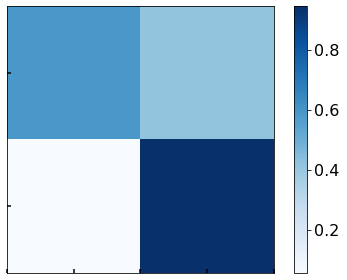

In [40]:
# Define classifiers
conversion_indices = {
  'aC': 0,
  'G': 1,
}

# Plot confusion matrix
confusion_matrix = np.zeros((len(conversion_indices), len(conversion_indices)))

# First row is Graphene Yield < 50% == 0
# Second row is Graphene Yield > 50% == 0
for i in range(len(test_labels)):
    confusion_matrix[int(test_labels[i]), int(pred_test[i])] += 1
    
print("\n===== Confusion Matrix (between subject's) =====")
print(confusion_matrix)

for i in range(confusion_matrix.shape[0]):
    # print(sum(confusion_matrix[i, :]))
    confusion_matrix[i, :] = confusion_matrix[i, :]/sum(confusion_matrix[i, :])
    
print("\n===== Normalized Confusion Matrix (between subject's) =====")
print(confusion_matrix)

print("\n===== Colormap of Normalized Confusion Matrix (between subject's) =====")
# Format plot
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
imshow_kwargs = {
    'cmap': 'Blues',
}
ax.set_yticks([0, 1])
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.imshow(confusion_matrix, **imshow_kwargs)
# plt.xlabel('Predicted', fontname="Arial", fontsize="20", fontweight = "bold")
# plt.ylabel('Actual', fontname="Arial", fontsize="20", fontweight = "bold")
cb = plt.colorbar()
cb.ax.tick_params(labelsize='16')
# plt.show()

metric = classification_report(test_labels, pred_test)
print(metric)

# Format and save
plt.tight_layout()
# plt.savefig('ConfusionMatrixClassifier.png', dpi=300) # Change file name
plt.show()

/tmp/ipykernel_32455/2813206783.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(trainX, trainy)
/home/kianoosh/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kianoosh/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.912
Logistic: ROC AUC=0.894
Logistic: ROC AUC=0.737
Logistic: ROC AUC=0.892
Logistic: ROC AUC=0.804
Logistic: ROC AUC=0.899


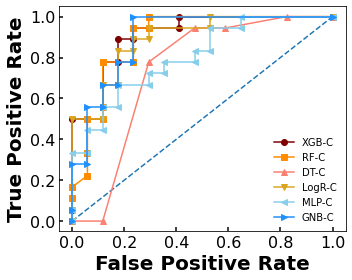

In [41]:
# Affix variables
testy = test_labels
testX = test_new_features
trainX = train_new_features
trainy = train_labels

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
# model = RandomForestClassifier(max_depth=4, n_estimators=200)

# Instantiate Models
model1 = XGBClassifier(max_depth=10, n_estimators=50, gamma=0.01, eval_metric='logloss',
                   learning_rate=0.2, subsample=0.75, min_child_weight=5, use_label_encoder=False)
model1.fit(trainX, trainy)

model2 = RandomForestClassifier(max_depth=10, min_samples_split=2)
model2.fit(trainX, trainy)

model3 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
model3.fit(trainX, trainy)

model4 = LogisticRegression(solver='lbfgs')
model4.fit(trainX, trainy)

model5 = MLPClassifier(hidden_layer_sizes=(200, 200, 200), activation='logistic', 
                   alpha=0.05, learning_rate = 'constant', solver='adam')
model5.fit(trainX, trainy)


model6 = GaussianNB()
model6.fit(trainX, trainy)

# Start here tomorrow, go through and copy the hyperparameters from below. Don't count on being able to find the same ones. 
###
###
###

# predict probabilities
lr_probs1 = model1.predict_proba(testX)
lr_probs2 = model2.predict_proba(testX)
lr_probs3 = model3.predict_proba(testX)
lr_probs4 = model4.predict_proba(testX)
lr_probs5 = model5.predict_proba(testX)
lr_probs6 = model6.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]
lr_probs4 = lr_probs4[:, 1]
lr_probs5 = lr_probs5[:, 1]
lr_probs6 = lr_probs6[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc1 = roc_auc_score(testy, lr_probs1)
lr_auc2 = roc_auc_score(testy, lr_probs2)
lr_auc3 = roc_auc_score(testy, lr_probs3)
lr_auc4 = roc_auc_score(testy, lr_probs4)
lr_auc5 = roc_auc_score(testy, lr_probs5)
lr_auc6 = roc_auc_score(testy, lr_probs6)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc1))
print('Logistic: ROC AUC=%.3f' % (lr_auc2))
print('Logistic: ROC AUC=%.3f' % (lr_auc3))
print('Logistic: ROC AUC=%.3f' % (lr_auc4))
print('Logistic: ROC AUC=%.3f' % (lr_auc5))
print('Logistic: ROC AUC=%.3f' % (lr_auc6))

# calculate roc curves: It will consider different threshold to compare the prob. 
# 50% is an usual number for binary classification. 
drop_intermediate = True
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr1, lr_tpr1, thresshold = roc_curve(testy, lr_probs1, drop_intermediate=drop_intermediate)
lr_fpr2, lr_tpr2, _ = roc_curve(testy, lr_probs2, drop_intermediate=drop_intermediate)
lr_fpr3, lr_tpr3, _ = roc_curve(testy, lr_probs3, drop_intermediate=drop_intermediate)
lr_fpr4, lr_tpr4, _ = roc_curve(testy, lr_probs4, drop_intermediate=drop_intermediate)
lr_fpr5, lr_tpr5, _ = roc_curve(testy, lr_probs5, drop_intermediate=drop_intermediate)
lr_fpr6, lr_tpr6, _ = roc_curve(testy, lr_probs6, drop_intermediate=drop_intermediate)

fig, ax = plt.subplots(figsize=(5,4))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='o', label='XGB-C', color='maroon')
pyplot.plot(lr_fpr2, lr_tpr2, marker='s', label='RF-C', color='darkorange')
pyplot.plot(lr_fpr3, lr_tpr3, marker='^', label='DT-C', color='salmon')
pyplot.plot(lr_fpr4, lr_tpr4, marker='v', label='LogR-C', color='goldenrod')
pyplot.plot(lr_fpr5, lr_tpr5, marker='<', label='MLP-C', color='skyblue')
pyplot.plot(lr_fpr6, lr_tpr6, marker='>', label='GNB-C', color='dodgerblue')

# axis labels
pyplot.xlabel('False Positive Rate', fontname="Arial", fontsize="20", fontweight = "bold")
pyplot.ylabel('True Positive Rate', fontname="Arial", fontsize="20", fontweight = "bold")
# show the legend
leg = plt.legend(frameon="True", prop={'family': 'Arial'})
ax.legend(frameon=False, ncol=1)
# show the plot
# Format and save
plt.tight_layout()
# plt.savefig('ROCcurves.png', dpi=300) # Change file name
plt.show()

In [ ]:
drop_internediate

In [ ]:
thresshold